# K Means Clustering

Count of Labels =  [(3, 94570), (1, 55249), (0, 54350), (2, 34844), (4, 23131)]


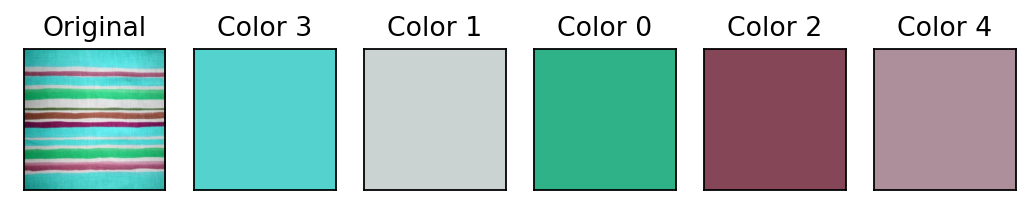

Count of Labels =  [(4, 88683), (1, 76710), (3, 63625), (0, 42566), (2, 35616)]


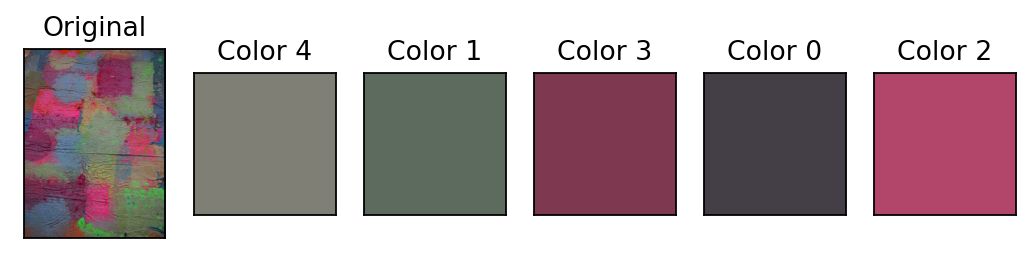

Count of Labels =  [(3, 32553), (1, 31329), (2, 26820), (4, 14968), (0, 14330)]


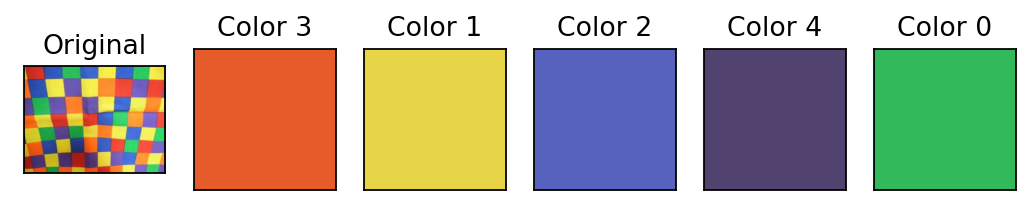

Count of Labels =  [(4, 153505), (3, 101594), (0, 95987), (2, 40596), (1, 17918)]


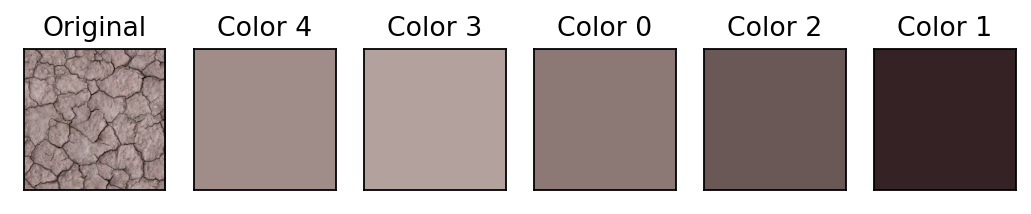

Count of Labels =  [(4, 62872), (0, 54493), (2, 51994), (3, 34763), (1, 22378)]


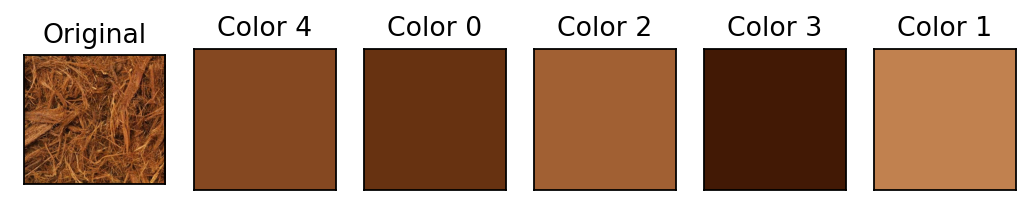

Count of Labels =  [(1, 72153), (3, 71765), (0, 40103), (2, 19745), (4, 17337)]


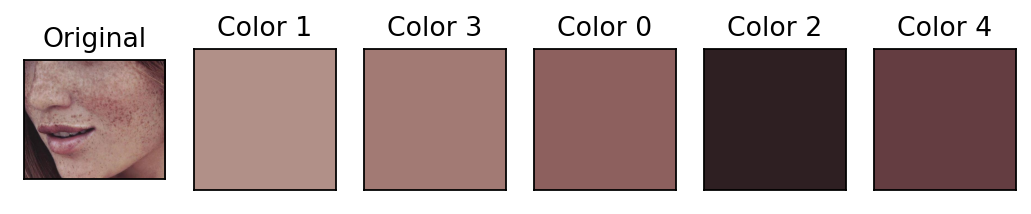

Count of Labels =  [(0, 55324), (3, 53363), (4, 50589), (2, 30719), (1, 29815)]


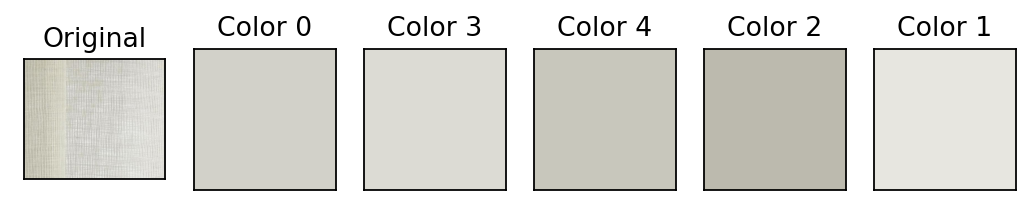

Count of Labels =  [(2, 54088), (0, 17491), (4, 12835), (1, 8624), (3, 3058)]


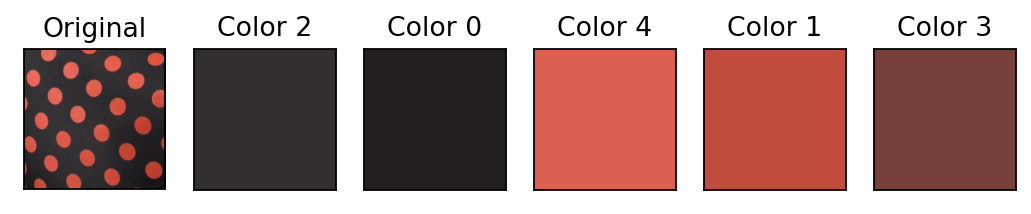

Count of Labels =  [(0, 105207), (2, 69627), (1, 47030), (4, 26077), (3, 22995)]


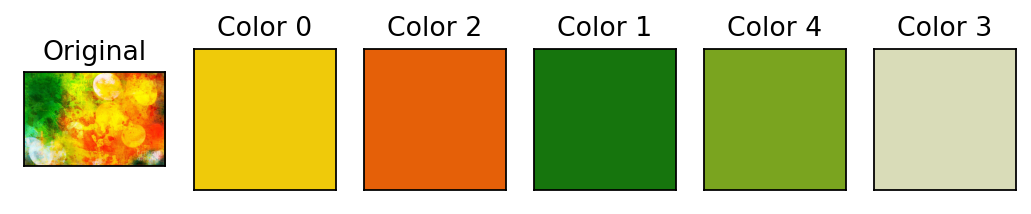

Count of Labels =  [(2, 53404), (0, 46697), (4, 31173), (1, 24207), (3, 19243)]


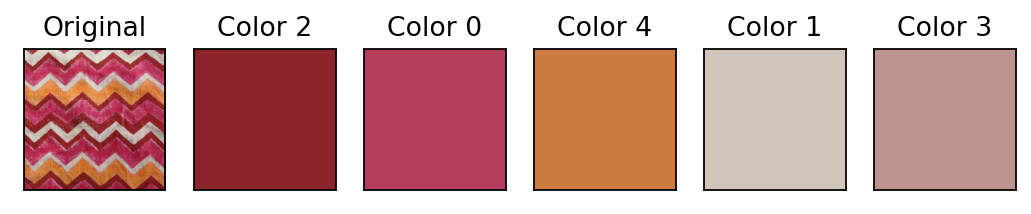

In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import os
from sklearn.cluster import KMeans

folder = 'sample'
for filename in os.listdir(folder):
    figure(figsize=(8, 6), dpi=160)
    img_original = cv.imread(folder+'/'+filename)
    img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    pixels = np.reshape(img_original,(-1,3))
    clustering = KMeans(init="k-means++",n_clusters=5).fit(pixels)
    labels_unique = np.unique(clustering.labels_)
    counter = Counter(clustering.labels_)
    print('Count of Labels = ',counter.most_common())
    plt.subplot(1,len(clustering.cluster_centers_)+1,1),plt.imshow(img_original)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    for i in range(len(counter.most_common())):
        color_i = [[clustering.cluster_centers_[counter.most_common()[i][0]]/255]*400]*400
        plt.subplot(1,len(clustering.cluster_centers_)+1,i+2),plt.imshow(color_i)
        plt.title('Color '+str(counter.most_common()[i][0])), plt.xticks([]), plt.yticks([])
    plt.show()

# Mean Shift Clustering

Count of Labels =  [(0, 2321), (1, 838), (2, 643), (3, 294)]


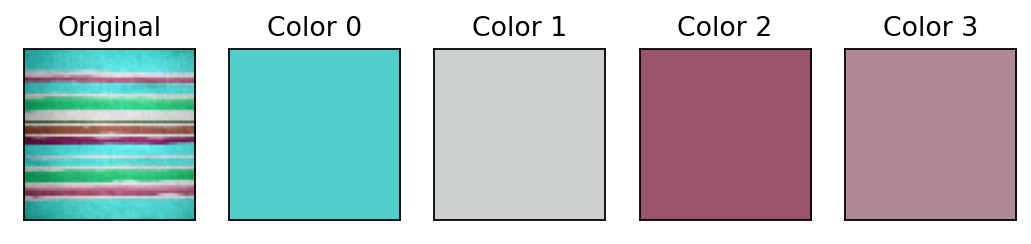

Count of Labels =  [(0, 4096)]


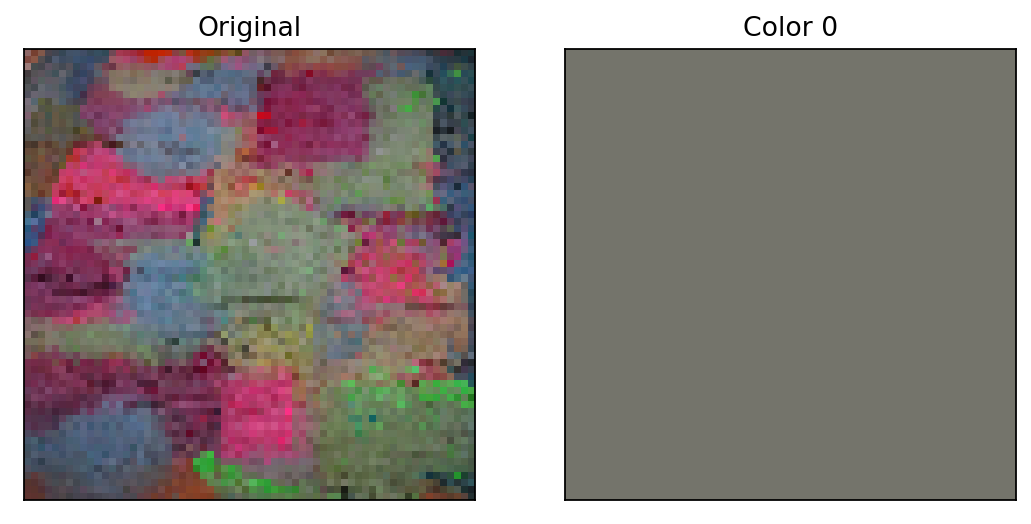

Count of Labels =  [(1, 1369), (2, 1115), (0, 1090), (3, 522)]


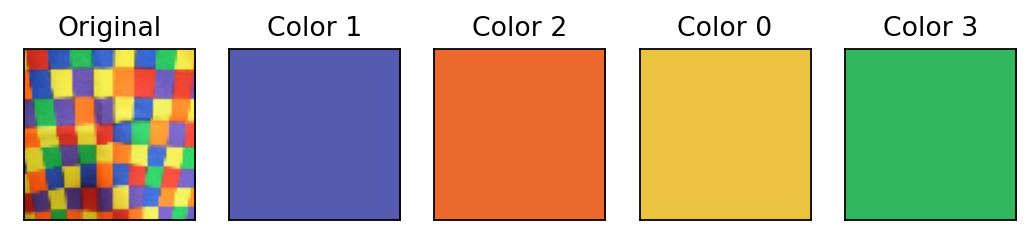

Count of Labels =  [(0, 3755), (1, 341)]


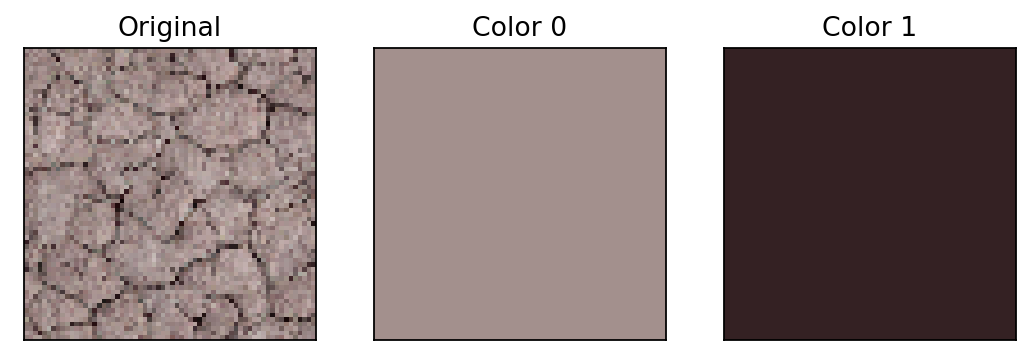

Count of Labels =  [(0, 3971), (1, 125)]


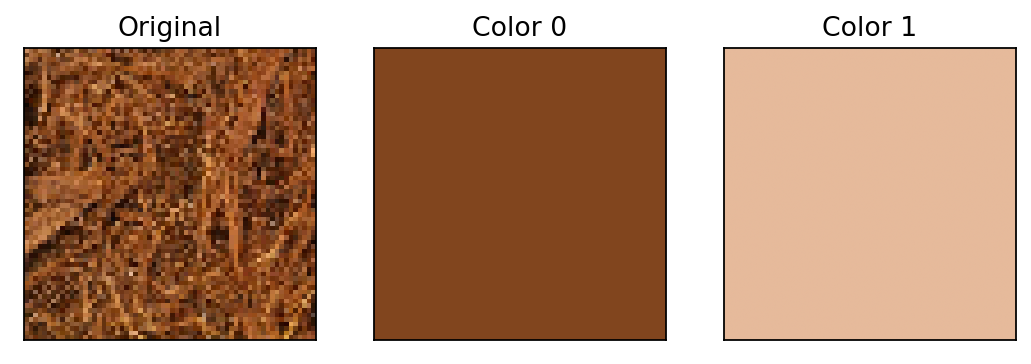

Count of Labels =  [(0, 3195), (2, 575), (1, 326)]


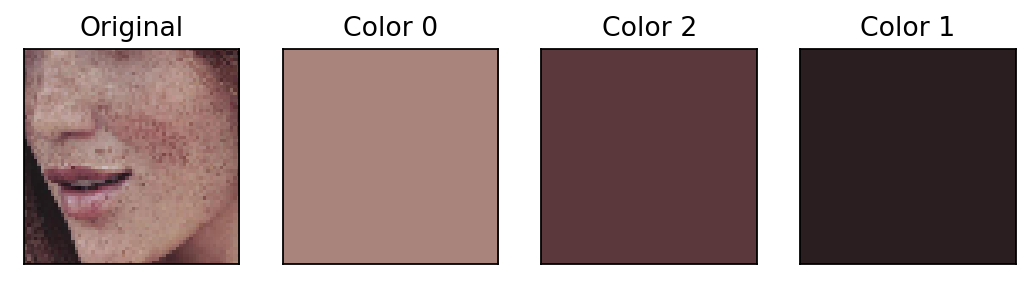

Count of Labels =  [(0, 2180), (1, 1916)]


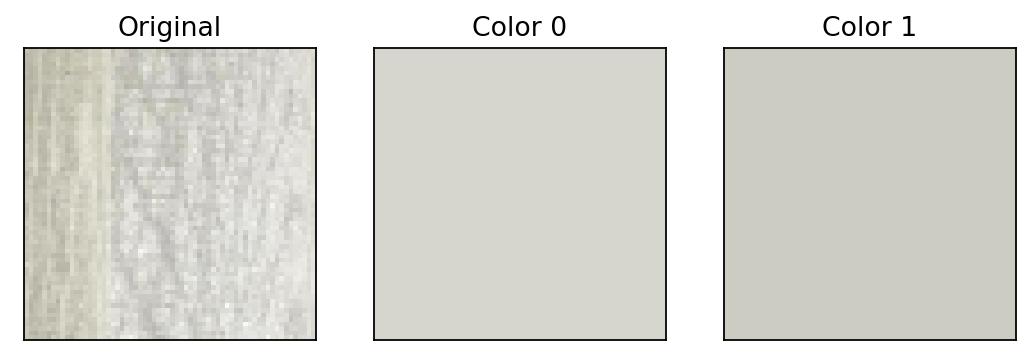

Count of Labels =  [(0, 3097), (1, 780), (2, 218), (3, 1)]


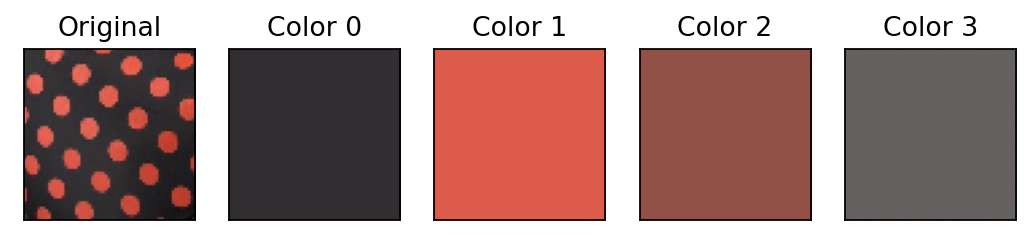

Count of Labels =  [(0, 2780), (1, 884), (2, 311), (3, 121)]


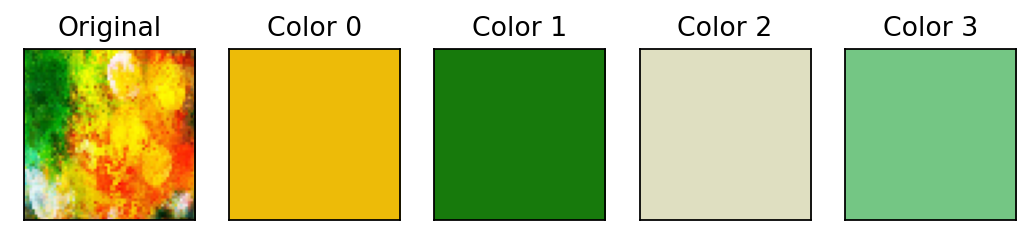

Count of Labels =  [(0, 2074), (2, 1149), (1, 873)]


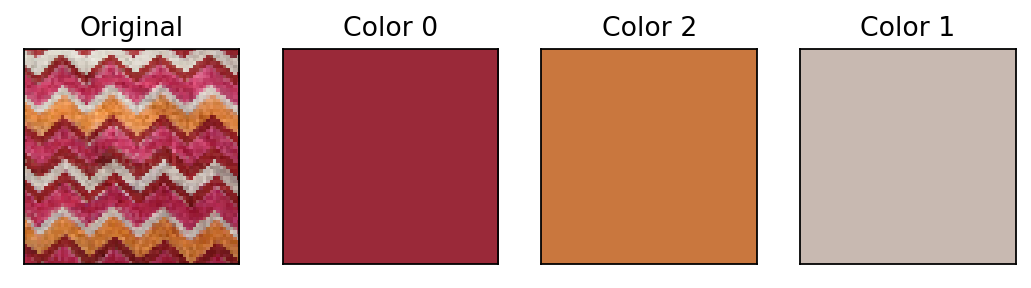

In [27]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import os
from sklearn.cluster import MeanShift, estimate_bandwidth
import torch

folder = 'sample'
for filename in os.listdir(folder):
    figure(figsize=(8, 6), dpi=160)
    img_original = cv.imread(folder+'/'+filename)
    img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    img_original = cv.resize(img_original,(64,64))
    pixels = np.reshape(img_original,(-1,3))
    bandwidth = estimate_bandwidth(pixels, quantile=0.2)
    clustering = MeanShift(bandwidth=bandwidth).fit(pixels)
    labels_unique = np.unique(clustering.labels_)
    counter = Counter(clustering.labels_)
    print('Count of Labels = ',counter.most_common())
    plt.subplot(1,len(clustering.cluster_centers_)+1,1),plt.imshow(img_original)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    for i in range(len(counter.most_common())):
        color_i = [[clustering.cluster_centers_[counter.most_common()[i][0]]/255]*400]*400
        plt.subplot(1,len(clustering.cluster_centers_)+1,i+2),plt.imshow(color_i)
        plt.title('Color '+str(counter.most_common()[i][0])), plt.xticks([]), plt.yticks([])
    plt.show()